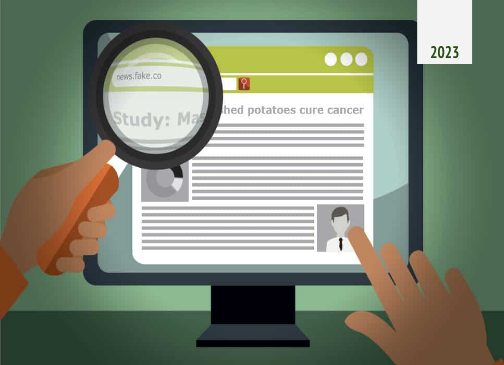

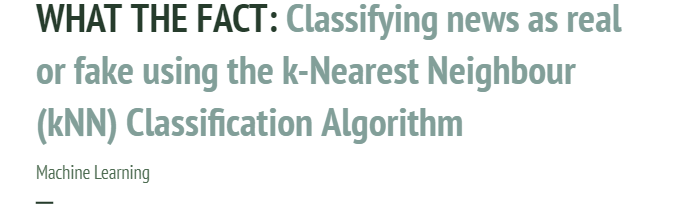

- ```Agdeppa, Kristian Roger M.```
- ```Berdon, Joear T.```
- ```Mustard, Rovic Kent Q.```
- ```Tahoynon, Shiela Jane L```

## A) Problem

*The spreading of fake news has been a significant issue in recent years, with clickbait headlines over the internet and recommendation system on social media platforms increasing more public engagement. This can be ascribed to the evolution of technology and reliant on social media which has led to significant societal impacts. With this ever-growing problem of fake news, this has raised concerns among the public about the danger of disinformation and misinformation. The potential danger of corrupting the naive minds and influencing the people has become a significant issue and requires immediate action.*

*In this study, we aim to construct a predictive model using K-Nearest Neighbors (KNN) to classify news articles as either fake or real based on their attributes such as title, news URL, source domain and number of engagements on social media.*
 
*The objective of this study is to achieve at least 80% accuracy using the KNN method. Additionally, we hope to identify the top five websites with highest engagement, top websites that are most likely to spread fake news, and finally top five websites that disclose fact-based news articles.*


## B.) Data Discussion

*The Fake News dataset based on FakeNewsNet was used in this study from [Kaggle](https://www.kaggle.com/datasets/algord/fake-news?fbclid=IwAR2hDzvfBqtuletvxRkvxWP-OBgXZxjOcJGyfgg9j8lDPCTYSc9qN0dhFWs), which contains over 21,000 articles labelled as either real or fake news. The dataset contains the following attributes:*
 
 
**title**  - the title of the article

**news_url** - URL of the article


**source_domain** - web domain where the article was posted.

**tweet_num** - number of retweets for this article.

**real** - label column, where 1 is real and 0 is fake.

https://www.kaggle.com/datasets/algord/fake-news?fbclid=IwAR2hDzvfBqtuletvxRkvxWP-OBgXZxjOcJGyfgg9j8lDPCTYSc9qN0dhFWs

## C.) k_NN implementation

### Import the Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# url parsing
from urllib.parse import urlparse

# data visualization 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# data standardization
from sklearn.preprocessing import MinMaxScaler

# knn model
from sklearn.neighbors import KNeighborsClassifier 

# performance measures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn import metrics


# miscellaneous
import warnings
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive (1)\FakeNewsNet.csv")

In [3]:
df

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
11043,How Michelle Pfeiffer Became “Unhireable” and ...,https://www.instyle.com/news/michelle-pfeiffer...,www.instyle.com,13,1
11044,﻿Lily Collins Opens Up About Overcoming Eating...,https://people.com/bodies/lily-collins-overcom...,people.com,73,1
11045,Pregnant Khloe Kardashian Shows Off Bare Baby ...,https://www.usmagazine.com/celebrity-moms/news...,www.usmagazine.com,13,1
11046,NYC: PHYSICIAN and Wife Jump To Death…Leave Ki...,https://newsbreakshere.com/nyc-physician-wife-...,newsbreakshere.com,0,0


### Data Cleaning

In [4]:
df.isna().sum()

title              0
news_url         152
source_domain    152
tweet_num          0
real               0
dtype: int64

In [5]:
# droping the rows that contains null values
df = df.dropna()

### Feature Engineering

*```Feature engineering``` is the process of **selecting**, **manipulating**, and **transforming** raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.*

In [6]:
# S feature that is equivalent to the length of the news title
df['title length'] = df['title'].str.len()

In [7]:
# A feature that is equivalent to the length of the news_url
df['news_url_length'] = df['news_url'].str.len()

In [8]:
# A feature that contains if the news_url has a word 'admin'
df['has_admin_in_url'] = [(1 if 'admin' in i.lower() else 0) if type(i) != float else 0 for i in df['news_url']]

In [9]:
df = df[['title', 'news_url', 'source_domain', 'tweet_num', 'has_admin_in_url','title length', 'news_url_length', 'real']]

### Exploratory Data Analysis

*[Exploratory Data Analysis](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.*

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10896 entries, 0 to 11047
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             10896 non-null  object
 1   news_url          10896 non-null  object
 2   source_domain     10896 non-null  object
 3   tweet_num         10896 non-null  int64 
 4   has_admin_in_url  10896 non-null  int64 
 5   title length      10896 non-null  int64 
 6   news_url_length   10896 non-null  int64 
 7   real              10896 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 766.1+ KB


In [11]:
df.describe()

,tweet_num,has_admin_in_url,title length,news_url_length,real
count,10896.000000,10896.000000,10896.000000,10896.000000,10896.000000
mean,85.001468,0.000642,68.151248,94.408866,0.765143
std,424.996445,0.025339,23.348242,28.626598,0.423929
min,0.000000,0.000000,6.000000,17.000000,0.000000
25%,11.000000,0.000000,55.000000,75.000000,1.000000
50%,38.000000,0.000000,68.000000,95.000000,1.000000
75%,65.000000,0.000000,84.000000,112.000000,1.000000
max,21182.000000,1.000000,200.000000,331.000000,1.000000


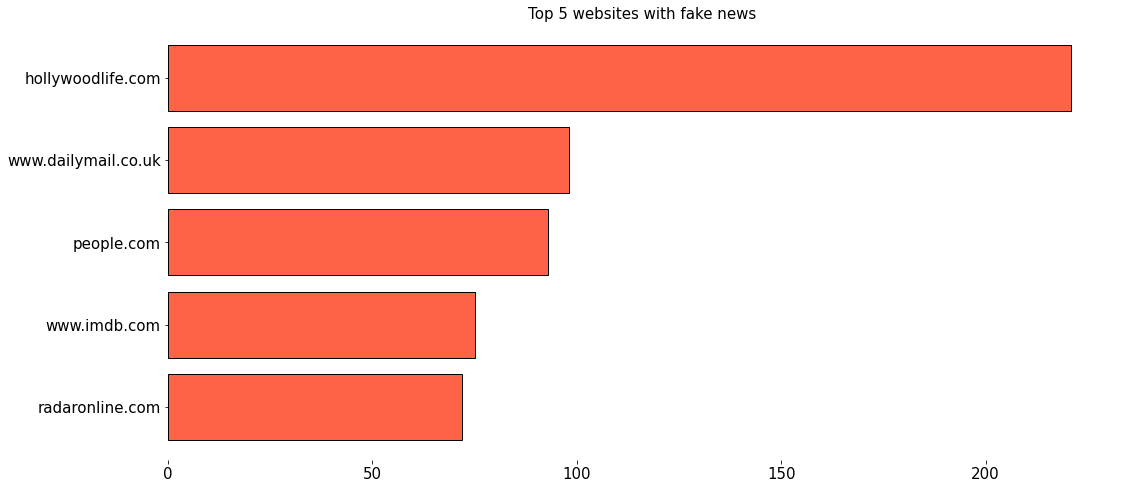

In [12]:
fig, axs = plt.subplots(figsize=(17, 8))
fake_news = df[df['real'] == 0]

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
    
fake_news_y = fake_news['source_domain'].value_counts().head()
fake_news_x = fake_news_y.index

bar_graph = axs.barh(fake_news_x, fake_news_y, ec='k', color='tomato')
plt.title('Top 5 websites with fake news', fontsize=15)
plt.tick_params(labelsize=15)
axs.invert_yaxis()

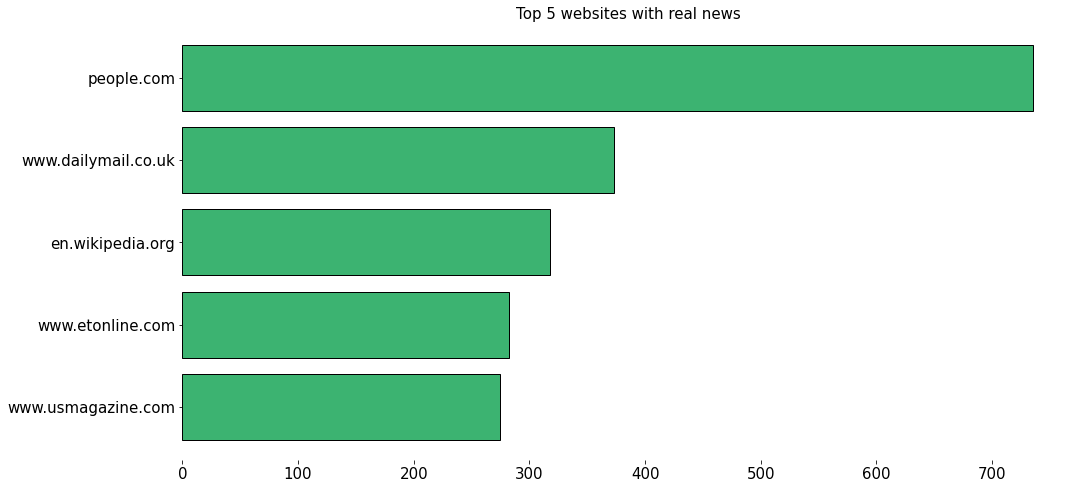

In [13]:
fig, axs = plt.subplots(figsize=(16, 8))
real_news = df[df['real'] == 1]

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
    
real_news_y = real_news['source_domain'].value_counts().head()
real_news_x = real_news_y.index

bar_graph = axs.barh(real_news_x, real_news_y, ec='k', color='mediumseagreen')
plt.title('Top 5 websites with real news', fontsize=15)
plt.tick_params(labelsize=15)
axs.invert_yaxis()

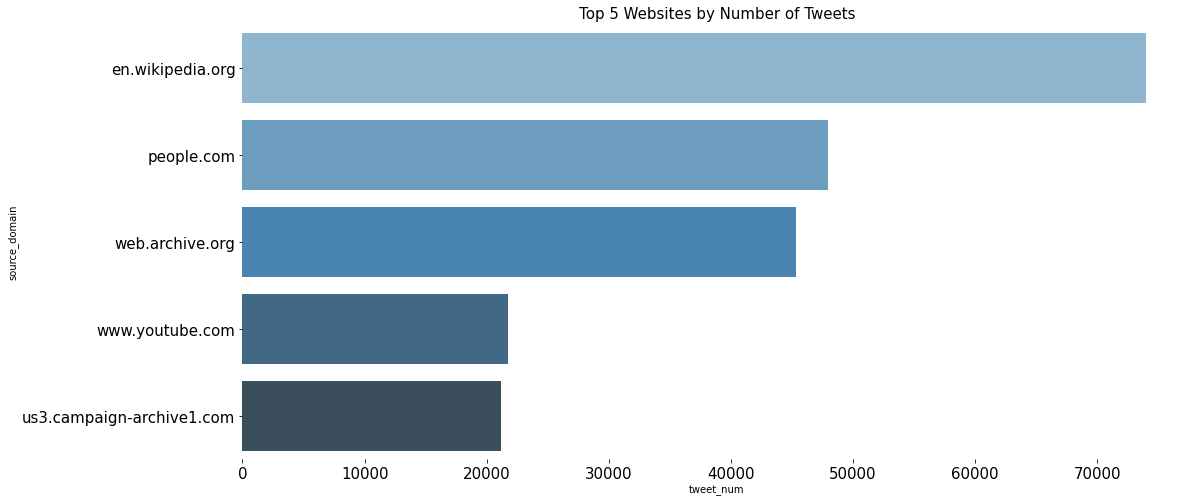

In [14]:
engagements = df[['source_domain', 'tweet_num']].groupby(['source_domain']).sum().sort_values(by='tweet_num', ascending=False).head()

fig, axs = plt.subplots(figsize=(17, 8))

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
    
engagements_x = engagements['tweet_num']
engagements_y = engagements.index

sns.barplot(x=engagements_x, y=engagements_y, palette='Blues_d')
plt.title('Top 5 Websites by Number of Tweets', fontsize=15)
plt.tick_params(labelsize=15)

In [15]:
engagements

,tweet_num
source_domain,
en.wikipedia.org,73993
people.com,47984
web.archive.org,45347
www.youtube.com,21756
us3.campaign-archive1.com,21182


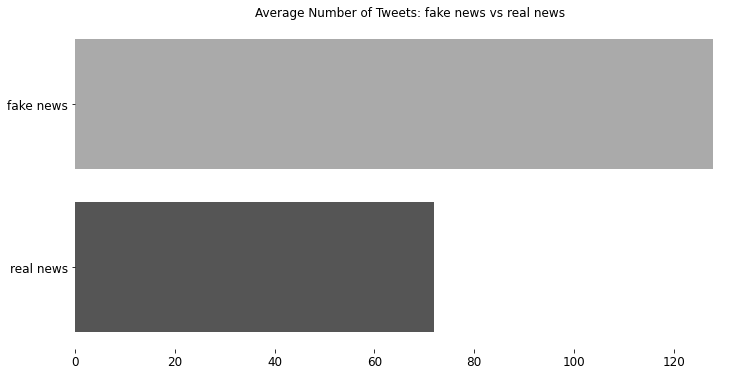

In [16]:
fake_news = df[df['real'] == 0]
real_news = df[df['real'] == 1]

results = [fake_news['tweet_num'].mean(), real_news['tweet_num'].mean()]

fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

sns.barplot(x=results, y=['fake news', 'real news'], palette='binary')
plt.title('Average Number of Tweets: fake news vs real news', fontsize=12)

plt.tick_params(labelsize=12)
plt.show()

### Feature Selection

*[Feature selection](https://www.heavy.ai/technical-glossary/feature-selection) is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Methodically reducing the size of datasets is important as the size and variety of datasets continue to grow. The main goal of feature selection is to improve the performance of a predictive model and reduce the computational cost of modeling.*

In [17]:
feature_selection_model = KNeighborsClassifier()
features_accuracy = {}

# calculating the mean accuracy of each feature and stores it in a dictionary
for i in df.columns[3: -1]:
    X_feature = df[[i]]
    scores = cross_val_score(feature_selection_model, X_feature, df['real'])
    features_accuracy[i] = scores.mean()

In [18]:
features_accuracy

{'tweet_num': 0.8010292154889669,
 'has_admin_in_url': 0.6590881264446699,
 'title length': 0.7291685016693965,
 'news_url_length': 0.7320108121308067}

*```tweet_num``` and ```news_url_length``` offers the highest accuracy and therefore choosen to be the features in the training and testing process*

### Data Normalization

*Also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in ```[0, 1]``` or ```[−1, 1]```.*

In [19]:
normalizer_ = MinMaxScaler()

for i in ['tweet_num', 'news_url_length']:
    df[i] = normalizer_.fit_transform(df[[i]])

### Data Splitting


*[Data splitting](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiMpLXnhOj9AhWvVmwGHXppD68QFnoECAsQAw&url=https%3A%2F%2Fwww.jstor.org%2Fstable%2F2684155%23%3A~%3Atext%3DData%2520splitting%2520is%2520the%2520act%2Cto%2520evaluate%2520the%2520model%27s%2520performance.&usg=AOvVaw29gt11CNWWFmmUuC-E6vlN) is the act of partitioning available data into. two portions, usually for cross-validatory purposes. One. portion of the data is used to develop a predictive model. and the other to evaluate the model's performance.*

In [20]:
X = df[['tweet_num', 'news_url_length']]
y = df['real']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

### Hyperparameter Tuning

*[Hyperparameter](https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide) tuning (or hyperparameter optimization) is the process of determining the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process. Each trial is a complete execution of your training application with values for your chosen hyperparameters, set within the limits you specify.*

In [22]:
neighbors = range(1, 41) # testing neighbors from 1 to 40
test_neighbor_accuracy = {}

# validation set
Xval_train, Xval_test, yval_train, yval_test = train_test_split(X_train, y_train, test_size=0.35, random_state=0)

for k in tqdm(neighbors):
    hyperparameter_test_model = KNeighborsClassifier(n_neighbors=k)
    hyperparameter_test_model.fit(Xval_train, yval_train)

    test_neighbor_accuracy[k] = hyperparameter_test_model.score(Xval_test, yval_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.29it/s]


In [23]:
test_neighbor_accuracy

{1: 0.7438483259378782,
 2: 0.7031060911657927,
 3: 0.7874142799515934,
 4: 0.7696651875756353,
 5: 0.790641387656313,
 6: 0.7837837837837838,
 7: 0.7858007260992336,
 8: 0.7741024606696248,
 9: 0.7866075030254135,
 10: 0.7749092375958048,
 11: 0.780960064542154,
 12: 0.7769261799112546,
 13: 0.7805566760790641,
 14: 0.7736990722065349,
 15: 0.7769261799112546,
 16: 0.7688584106494554,
 17: 0.772085518354175,
 18: 0.7676482452601856,
 19: 0.7732956837434449,
 20: 0.7700685760387252,
 21: 0.7708753529649052,
 22: 0.7684550221863655,
 23: 0.7736990722065349,
 24: 0.7712787414279951,
 25: 0.7769261799112546,
 26: 0.7757160145219847,
 27: 0.7777329568374345,
 28: 0.7761194029850746,
 29: 0.7801532876159741,
 30: 0.7781363453005244,
 31: 0.7805566760790641,
 32: 0.7801532876159741,
 33: 0.7805566760790641,
 34: 0.7801532876159741,
 35: 0.781363453005244,
 36: 0.780960064542154,
 37: 0.7789431222267044,
 38: 0.7801532876159741,
 39: 0.7793465106897943,
 40: 0.7801532876159741}

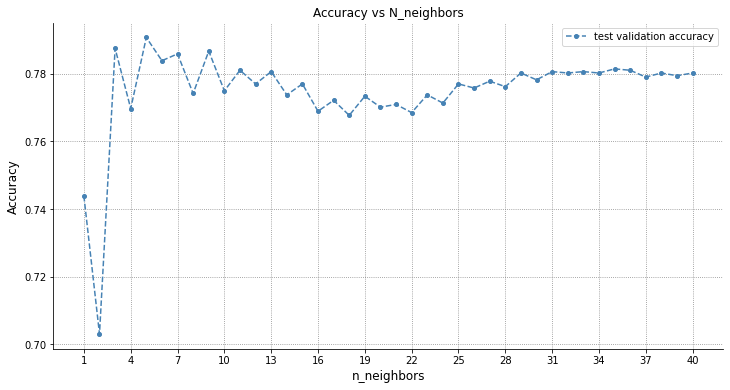

In [24]:
fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)
    
axs.grid(visible=True, color='grey', linestyle=":")

axs.plot(test_neighbor_accuracy.keys(), 
         test_neighbor_accuracy.values(), 
         marker='.', 
         label="test validation accuracy", 
         markersize=8, linestyle='--', 
         color='steelblue')

plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("n_neighbors", fontsize=12)
plt.title("Accuracy vs N_neighbors", fontsize=12)
plt.xticks(np.arange(1, 41, 3))

plt.legend()
plt.show()

In [25]:
print(f'K with the highest accuracy: {max(test_neighbor_accuracy, key=lambda x: test_neighbor_accuracy[x])}')

K with the highest accuracy: 5


### Model Training

*A [training model](https://oden.io/glossary/model-training/) is a dataset that is used to train an ML algorithm. It consists of the sample output data and the corresponding sets of input data that have an influence on the output. The training model is used to run the input data through the algorithm to correlate the processed output against the sample output. The result from this correlation is used to modify the model.*

In [26]:
knn_model = KNeighborsClassifier(n_neighbors = 5) # setting k=5

In [27]:
performance_measures = ['accuracy', 'precision', 'recall', 'f1', 'specificity', 'sensitivity']
results = {}

for i in tqdm(performance_measures):
    if i == 'specificity':
        specificity = make_scorer(recall_score, pos_label=0) # specificity formula: tn / (tn+fp)
        scores = cross_val_score(knn_model, X, y, cv=10, scoring=specificity)
    elif i == 'sensitivity':
        sensitivity = make_scorer(recall_score, pos_label=1) # sensitivity formula: tp / (tp+fn)
        scores = cross_val_score(knn_model, X, y, cv=10, scoring=sensitivity)
    else:
        scores = cross_val_score(knn_model, X, y, cv=10, scoring=i)
        
    results[f'Average {i.title()}'] = (scores.mean() * 100)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.05it/s]


#### *10-fold Cross-Validation Results (Top 2 Features)*

In [28]:
results

{'Average Accuracy': 80.2220453071162,
 'Average Precision': 83.85824536376501,
 'Average Recall': 91.83169670745997,
 'Average F1': 87.66064291543911,
 'Average Specificity': 42.39950980392157,
 'Average Sensitivity': 91.83169670745997}

####  *10-fold Cross-Validation Results (All (4) Features)*

In [29]:
X = df[['tweet_num', 'has_admin_in_url', 'title length', 'news_url_length']]
y = df['real']

In [30]:
performance_measures = ['accuracy', 'precision', 'recall', 'f1', 'specificity', 'sensitivity']
results = {}

for i in tqdm(performance_measures):
    if i == 'specificity':
        specificity = make_scorer(recall_score, pos_label=0) # specificity formula: tn / (tn+fp)
        scores = cross_val_score(knn_model, X, y, cv=10, scoring=specificity)
    elif i == 'sensitivity':
        sensitivity = make_scorer(recall_score, pos_label=1) # sensitivity formula: tp / (tp+fn)
        scores = cross_val_score(knn_model, X, y, cv=10, scoring=sensitivity)
    else:
        scores = cross_val_score(knn_model, X, y, cv=10, scoring=i)
        
    results[f'Average {i.title()}'] = (scores.mean() * 100)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.11s/it]


In [31]:
results

{'Average Accuracy': 74.83469389474394,
 'Average Precision': 78.71953534549716,
 'Average Recall': 91.97553841680556,
 'Average F1': 84.8313031088248,
 'Average Specificity': 18.99142156862745,
 'Average Sensitivity': 91.97553841680556}

Compute the **proportion chance criteria,** $\mathbf{P}_{CC}$ for $M$ possible states given by:
    
\begin{equation}
\mathbf{P}_{CC}= (\frac{n_1}{N})^2 + (\frac{n_2}{N})^2 + \cdots + (\frac{n_M}{N})^2  
\end{equation}

Population per class:       0
1  8337
0  2559

1.25 * Proportion Chance Criterion: 80.0752253888587%


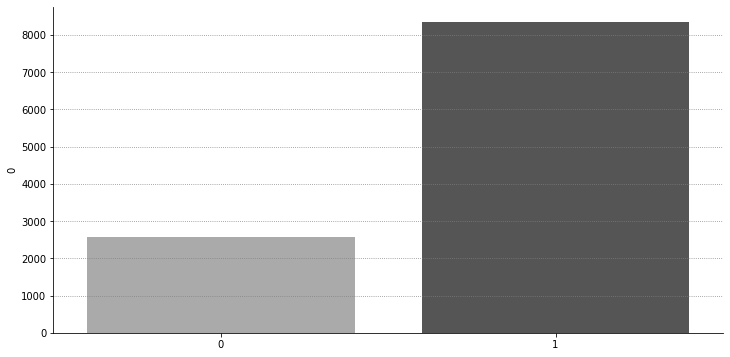

In [32]:
state_counts = Counter(df['real'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')

fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)
    
axs.grid(visible=True, color='grey', linestyle=":")

sns.barplot(x=df_state.index, y=df_state[0], palette='binary')


num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

## D.) Three highlights of the result


1. The optimal number of neighbour is 5 with: 
        Highest test accuracy 80.2220453071162 (using top 2 features)
        
        Highest test accuracy 81.5435674509903 (All 5 features)


2. The mean test accuracy exceeded the required 1.25 * Proportion Chance Criterion: **80.07%**


3. The features that affect the target most are the following:

        Feature: tweet_num
        Accuracy: 0.8010292154889669
        
        Feature: news_url_length
        Accuracy: 0.7320108121308067

        Feature: title length
        Accuracy: 0.7291685016693965

## E.) Discussion of results

*Based on the accuracy  from **1-40 n_neighbors** for the ```FakeNewsNet dataset```, it indicates that the accuracy was found to be the lowest when n_neighbors was 2 with ```70% validation set accuracy```, and has the highest validation set accuracy when n_neighbors was ```5```, with a validation set accuracy value of 79%. Subsequently, a slight decrease until n_neighbors 17 and started to increase again. **It also shows a consistent trend of validation set accuracy from n_neighbors 30 to n_neighbor 40.***

*The prediction model’s accuracy, which exceeded the required threshold of 80%, confirms that ```K-Nearest Neighbors (KNN)``` model is effective in the classification of news articles as either fake or not, based on the news title, news URL, source domain and number of tweets. **It suggests that the model successfully identified the nature of fake and real news articles and was able to identify well to new, unseen data.***

*The ```tweet_num``` feature also has a high accuracy, an important feature to use for the KNN Model, followed by ```title length``` and ```news_url_length```. Moreover, the result in **(2 features)**, ```Recall/Sensitivity``` suggest that we **predicted 91.831% of our positive classes or real news, correctly**; on the other hand, the ```Specificity``` result is 42.399 which means that **we only predicted 42.399% of all our negative classes or fake news, correctly.***

*Furthermore, it is also good to note that among the highest number of engagements like in Twitter has become a breeding ground for media platform outlets to spread fake news. In fact, ```en.wikipedia.org```, ```people.com```, ```web.archive.org```, ```www.youtube.com``` and ```us3.campaign-archive1.com``` **are the top 5 websites based on number of tweets.***

*The graph representation of the top five websites that spread fake news as well as the real news articles highlights the need for being cautious when trusting news resources. **Notably, there is a website that appears in both lists, indicating that even sources that usually provide real news may sometimes publish fake news.***

*Despite the fact that ```Wikipedia``` is viewed as an **unreliable** source of information, **Wikipedia ranks highly in terms of both Twitter engagements and production of real news, Top 1 and Top 3, respectively**. This suggests that public opinion affects the overall reputation and its credibility as news media outlets. They can be subject to public scrutiny and can be tagged as "fake news" and accused as false information peddlers.*

*Overall, in our ongoing efforts in combating fake news, it has shown that the kNN Classification model is a promising approach in classifying news whether it is fake or real. **It can be a tool to utilise for fact checking and identifying fake news.***